<a href="https://colab.research.google.com/github/Hwarriach/Fake_News/blob/main/Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

import warnings
warnings.filterwarnings("ignore")

In [58]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fake News/train.csv")
print(df.shape)
df.head()

(20800, 5)


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [59]:
#Printing Dimension of datasets

print("Dimension of dataset:", df.shape)
print("Number of rows in the dataset:", df.shape[0])
print("Number of columns in the dataset:", df.shape[1])

Dimension of dataset: (20800, 5)
Number of rows in the dataset: 20800
Number of columns in the dataset: 5


In [60]:
# printing attributes (columns) name

print("Column Names:",df.columns.values)

Column Names: ['id' 'title' 'author' 'text' 'label']


In [61]:
# Showing datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [62]:
#Identifing missing Values
miss_val = df.isna().sum()
miss_val

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [63]:
#Dropping null values

df=df.dropna()
df = df.reset_index(drop = True)
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [64]:
print("Dimension of dataset after dropping null values:", df.shape)

Dimension of dataset after dropping null values: (18285, 5)


In [65]:
#data points for each class
df.label.value_counts()

0    10361
1     7924
Name: label, dtype: int64

Text(0.5, 1.0, 'label distribution')

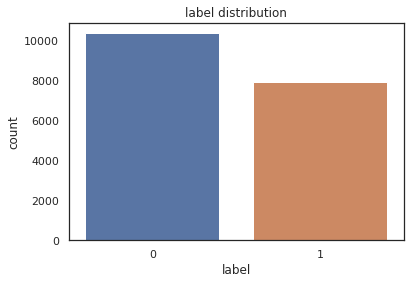

In [66]:
#Count plot for label

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot('label',data = df)
plt.title("label distribution")

In [67]:
x = df.drop('label', axis=1)
y = df['label']

In [68]:
messages=df.copy()
messages.reset_index(inplace=True)
messages['text'][1]

'Ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [Hillary Clinton remains the big woman on campus in leafy, liberal Wellesley, Massachusetts. Everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way Miss Havisham forever wore that wedding dress.  Speaking of Great Expectations, Hillary Rodham overflowed with them 48 years ago when she first addressed a Wellesley graduating class. The president of the college informed those gathered in 1969 that the students needed “no debate so far as I could ascertain as to who their spokesman was to be” (kind of the like the Democratic primaries in 2016 minus the   terms unknown then even at a Seven Sisters school). “I am very glad that Miss Adams made it clear that what I am speaking for today is all of us —  the 400 of us,” Miss Rodham told her classmates. After appointing herself Edger Bergen to the Charlie McCarthys and Mor

**Text Preprocessing: Stemming, stop-word removal and Lemmatization.**

In [98]:
#set of stopwords
import nltk
nltk.download('stopwords')
import re
import nltk
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

#initialising the snowball stemmer
sno = nltk.stem.SnowballStemmer('english')                      


#function to clean the word of any html-tags
def cleanhtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext



#function to clean the word of any punctuation or special characters
def cleanpunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


#function to text summarization
def final_sentence(text):
    
    text = text.split()
    text = [cleanhtml(x) for x in text]
    text = [cleanpunc(x) for x in text]
    
    def test(word):
        if word.isalpha() and len(word) > 2 and word.lower() not in stop:
            return True
        else:
            return False
    
    text = [x for x in text if test(x)]
    
    return ' '.join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [100]:
df['CleanedText'] = df['text'].apply(final_sentence)
print(df.shape)
df.head()

(18285, 6)


,id,title,author,text,label,CleanedText
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Even See Letter Jason Chaffetz Tweet...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,Ever get feeling life circles roundabout rathe...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Truth Might Get Fired October tension intellig...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Videos Civilians Killed Single Airstrike Ident...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Print Iranian woman sentenced six years prison...


In [105]:
df['CleanedText'][1]

'Ever get feeling life circles roundabout rather heads straight line toward intended Clinton remains big woman campus liberal Everywhere else votes likely inauguration dress remainder days way Miss Havisham forever wore wedding Speaking Great Hillary Rodham overflowed years ago first addressed Wellesley graduating president college informed gathered students needed debate far could ascertain spokesman like Democratic primaries minus terms unknown even Seven Sisters glad Miss Adams made clear speaking today Miss Rodham told appointing Edger Bergen Charlie McCarthys Mortimer Snerds bespectacled granny glasses matronly wisdom least John Lennon took issue previous Despite becoming first win election seat Senate since Edward Brooke came criticism calling goals protestors criticized Though Clinton senior thesis Saul Alinsky lamented Power arrogance repressive within New similar words coming Republican necessitated brief Rodham ironically observed one word asked class rehearsal wanted say eve

**Bag of Words model**

In [106]:
# Applying Countvectorizer
# Creating the Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X_cv = cv.fit_transform(df['CleanedText']).toarray()

In [107]:
df_cv = pd.concat([df,pd.DataFrame(X_cv)],axis = 1)
df_cv.head()

,id,title,author,text,label,CleanedText,0,1,2,3,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Even See Letter Jason Chaffetz Tweet...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,Ever get feeling life circles roundabout rathe...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Truth Might Get Fired October tension intellig...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Videos Civilians Killed Single Airstrike Ident...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Print Iranian woman sentenced six years prison...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
# Divide the dataset into Train and Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cv, y, test_size=0.33, random_state=0)

In [77]:
# SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=12)
X_train, y_train = smote.fit_resample(X_train,y_train)

**TF-IDF**

In [110]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
TfIdf = TfidfVectorizer(ngram_range=(1,2)) #in scikit-learn
X = TfIdf.fit_transform(df['CleanedText'].values)


print("the type of count vectorizer ",type(X))
print("the shape of out text BOW vectorizer ",X.get_shape())
print("the number of unique words including both unigrams and bigrams ", X.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (18285, 3614927)
the number of unique words including both unigrams and bigrams  3614927


In [93]:
TfIdf.get_feature_names()[:20]

['aaa',
 'aaa affiliate',
 'aaa back',
 'aaa comes',
 'aaa credit',
 'aaa economic',
 'aaa found',
 'aaa means',
 'aaa motor',
 'aaa predicts',
 'aaa president',
 'aaa rating',
 'aaa recommends',
 'aaa safety',
 'aaa severino',
 'aaaaah',
 'aaaaggg',
 'aaaaggg evan',
 'aaajiao',
 'aaajiao nom']

In [94]:
TfIdf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 2),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

**Naive bayes for TF-idf**

In [111]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pylab as pyplt

def Multinomial_NB(X_train,X_cv,Y_train,Y_cv):
    #############################################################################
    best_alpha=0
    max_roc_auc=-1
    pred_cv = []
    pred_train = []
    alpha=[10000,5000,1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001]
    #############################################################################

    for i in alpha:
        mulbnb = MultinomialNB(alpha=i)
        mulbnb.fit(X_train,Y_train)
        probs = mulbnb.predict_proba(X_cv)[:,1]     
        prob = mulbnb.predict_proba(X_train)[:,1]
        #############################################################################

        auc_score_cv = roc_auc_score(Y_cv,probs)            #auc roc for cv
        auc_score_train = roc_auc_score(Y_train,prob)       #auc roc for train
        #############################################################################

        print(i," ------> ",auc_score_cv)
        #############################################################################

        pred_cv.append(auc_score_cv)
        pred_train.append(auc_score_train)
        #############################################################################

        if(max_roc_auc<auc_score_cv):
            max_roc_auc=auc_score_cv
            best_alpha=i

    print("*"*100)
    print(f"\n Best alpha Value {best_alpha} with highest roc_auc Score is {max_roc_auc}")
    print("*"*100)
    #############################################################################

    sns.set_style("darkgrid")
    plt.xscale('log')
    plt.plot(alpha, pred_cv,'r-', label = 'CV Data')
    plt.plot(alpha,pred_train,'g-', label ='Train Data')
    plt.legend(loc='upper right')
    plt.title(r'Auc Score v/s $\alpha$')
    plt.xlabel(r"alpha values",fontsize=12)
    plt.ylabel("roc_auc",fontsize=12)
    plt.show()
    print("*"*100)
    #############################################################################

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(Y_cv,probs)
    # plot no skill
    pyplt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplt.plot(fpr, tpr, marker='.')
    pyplt.title("Line Plot of ROC Curve on Train Data")
    pyplt.ylabel('True Positive Rate')
    pyplt.xlabel('False Positive Rate')
    pyplt.show()
    print("*"*100)
    
    #############################################################################
    return best_alpha

10000  ------>  0.8662457147050158
5000  ------>  0.8804242394639898
1000  ------>  0.9349471535114161
500  ------>  0.951442709472891
100  ------>  0.9552894663652157
50  ------>  0.9555849289651928
10  ------>  0.9581195843472958
5  ------>  0.9588732676769602
1  ------>  0.9599197372139243
0.5  ------>  0.9601339601444985
0.1  ------>  0.9604973362086712
0.05  ------>  0.9605794680089668
0.01  ------>  0.9607293459989156
0.005  ------>  0.9607770192434866
0.001  ------>  0.9608761572889213
0.0005  ------>  0.9609081624846916
0.0001  ------>  0.9609789196161072
5e-05  ------>  0.9610047356538105
1e-05  ------>  0.9610679654308201
****************************************************************************************************

 Best alpha Value 1e-05 with highest roc_auc Score is 0.9610679654308201
****************************************************************************************************


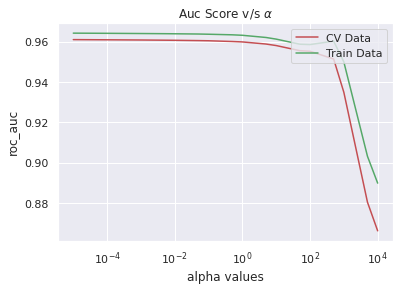

****************************************************************************************************


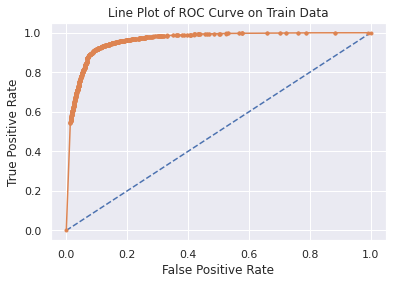

****************************************************************************************************


In [112]:
best_alpha_idf = Multinomial_NB(X_train,X_test,y_train,y_test)

In [114]:
# Train & Test Model

from sklearn import metrics
from sklearn.metrics import confusion_matrix

NB_tfidf = MultinomialNB(alpha = best_alpha_idf, fit_prior=True, class_prior=None)
NB_tfidf.fit(X_train,y_train)
prediction=NB_tfidf.predict(X_test) 

print("Precision recall report for data:\n",metrics.classification_report(y_test, prediction))

Precision recall report for data:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      3389
           1       0.91      0.86      0.88      2646

    accuracy                           0.90      6035
   macro avg       0.90      0.89      0.90      6035
weighted avg       0.90      0.90      0.90      6035



AUC Score 0.9610679654308201
**********************************************************************


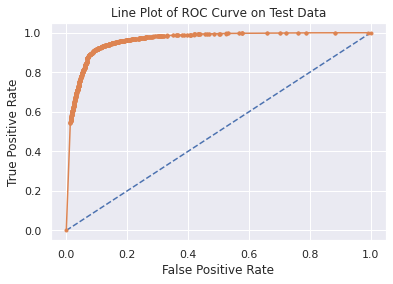

In [121]:
# Plotting roc_auc curve

probs = NB_tfidf.predict_proba(X_test)

#############################################################################
roc_auc = roc_auc_score(y_test,probs[:,1])
print("AUC Score",roc_auc)
print("*"*70)
#############################################################################'
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,probs[:,1])
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title("Line Plot of ROC Curve on Test Data")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate') 

plt.show()

In [115]:
# Top Features

model , classifier = TfIdf , NB_tfidf
neg = classifier.feature_log_prob_[0].argsort()
pos = classifier.feature_log_prob_[1].argsort()
top_pos_words = np.take(model.get_feature_names(),pos)
top_neg_words = np.take(model.get_feature_names(),neg)
imp_df = pd.DataFrame(columns = ['Pos_Words','Pos_Importance','Neg_Words','Neg_Importance'])
imp_df['Pos_Words'] = top_pos_words[::-1]
imp_df['Pos_Importance'] = np.take(classifier.feature_log_prob_[1],pos)[::-1]
imp_df['Neg_Words'] = top_neg_words[::-1]
imp_df['Neg_Importance'] = np.take(classifier.feature_log_prob_[0],neg)[::-1]
imp_df

,Pos_Words,Pos_Importance,Neg_Words,Neg_Importance
0,able reach,-4.959972,abide border,-4.179602
1,abandoned old,-5.011528,abject thugs,-4.213272
2,ability cure,-5.209490,able reach,-4.845958
3,ability acknowledging,-5.221495,able existing,-5.270402
4,able existing,-5.254353,ability acknowledging,-5.271538
...,...,...,...,...
4995,abide district,-26.063521,abdulqader mayor,-26.454189
4996,able paint,-26.063521,abdulqader,-26.454189
4997,abide european,-26.063521,ability enter,-26.454189
4998,abdication power,-26.063521,abdullahi acting,-26.454189
